<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/machine_learning_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Ads

Prediction system to predict which user is going to buy a product displayed on a social media advertisement

과제는 첨부된  Socail_Network_Ads.csv 파일의 데이터를 중심으로 분류 모델을 구성하라. 어떠한 모델로 해도 상관이 없다. SVM, Naive Bayes, Decision Tree ...

In [41]:
# 데이터를 수집합니다.
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [42]:
# 수집된 데이터 샘플을 확인합니다.
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
#Gender에 해당하는 데이터를 숫자로 매핑합니다.
df['label'] = df['Gender'].map({"Male":1,"Female":0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased,label
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [44]:
# sklearn의 train_test_split을 사용하여 데이터를 나눕니다.
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다.
train, test = train_test_split(df, test_size=0.2)

In [45]:
# 학습 데이터의 갯수를 확인합니다,
train.shape[0]

320

In [46]:
# 테스트 데이터의 갯수를 확인합니다.
test.shape[0]

80

In [47]:
#다듬어진 데이터를 파일로 저장합니다.
import pickle
with open('social_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
    
with open('social_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [48]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
#데이터 분석 단계에서 생성한 학습 데이터 및 테스트 데이터를 로드합니다.
with open('/content/social_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('/content/social_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [50]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['label', 'Age' , 'EstimatedSalary']]
y_train = train[['Purchased']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.815625,
 0.803125,
 0.825,
 0.83125,
 0.825,
 0.80625,
 0.809375,
 0.803125,
 0.809375,
 0.79375,
 0.79375,
 0.796875,
 0.80625,
 0.79375,
 0.79375,
 0.7875,
 0.78125,
 0.784375,
 0.778125,
 0.790625,
 0.7875,
 0.78125,
 0.79375,
 0.7875,
 0.775,
 0.790625,
 0.78125,
 0.784375,
 0.778125,
 0.771875,
 0.771875,
 0.76875,
 0.765625,
 0.765625,
 0.765625,
 0.765625,
 0.765625,
 0.759375,
 0.7625,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.759375,
 0.75625,
 0.74375,
 0.715625,
 0.69375,
 0.68125,
 0.66875,
 0.659375,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625,
 0.65625]

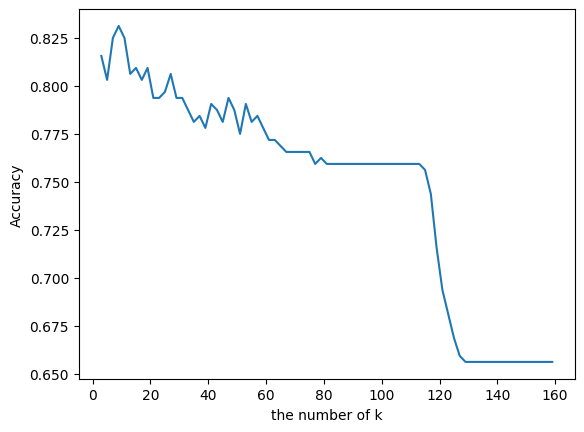

In [51]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['label', 'Age', 'EstimatedSalary']]
# select target
y_train = train[['Purchased']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['label', 'Age', 'EstimatedSalary']]

# select target
y_test = test[['Purchased']]

# test
pred = knn.predict(x_test)

In [53]:
#confusion matrix를 출력합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred))

[[47  0]
 [33  0]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        47
           1       0.00      0.00      0.00        33

    accuracy                           0.59        80
   macro avg       0.29      0.50      0.37        80
weighted avg       0.35      0.59      0.43        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
